Website:
https://jesparza17.github.io/Jesparza17/



# Spin to Win? An Analysis of Which Pitchers Were Hurt the Most After MLB's Crackdown on Sticky Stuff
### By: Julian Esparza and Sam Broth

### Background

The two of us are working together on our final tutorial project. We would like to analyze data about baseball, specifically about pitchers, to attempt to conclude which pitchers may have been using illegal “sticky stuff” prior to the crackdown on it by Major League Baseball. Three rules in the [MLB’s very detailed rulebook](https://img.mlbstatic.com/mlb-images/image/upload/mlb/atcjzj9j7wrgvsm8wnjq.pdf "2021 MLB Rulebook") essentially prohibit the application of “foreign substances” directly on the baseball. While these rules have been there for a long time, they were very rarely enforced. One anonymous former pitcher estimated that prior to June 2021, [an overwhelming majority of pitchers in the MLB used some substance(s)](https://www.si.com/mlb/2021/06/04/sticky-stuff-is-the-new-steroids-daily-cover "'This Should Be the Biggest Scandal in Sports'") to help them alter the movement and spin on their pitches. These substances range anywhere from sunscreen to glue. It always seemed that everyone accepted how the MLB and its umpires turned a blind eye to this - that is, until a few months ago. On June 21, 2021, commissioner Rob Manfred and Major League Baseball finally [decided to enforce the rules](https://www.espn.com/mlb/story/_/id/31682815/major-league-baseball-crackdown-sticky-substances-begins-regular-checks-pitchers-monday "Major League Baseball's crackdown on sticky substances begins with regular checks on pitchers Monday") and crackdown on sticky stuff. After all, the league-wide batting average was the [lowest it had been since 1968](https://www.espn.com/mlb/story/_/id/31371552/mlb-hopes-offensive-numbers-perk-historically-rough-april-hitters "MLB hopes offensive numbers perk up after historically rough April for hitters")! 
Using data from multiple sources, we hope to see which pitchers were negatively affected from this change. The dataset we are most excited about working with is from [Baseball Savant](https://baseballsavant.mlb.com/ "Baseball Savant"), a really great website for all things [sabermetrics](https://en.wikipedia.org/wiki/Sabermetrics "Sabermetrics"). There is a plethora of statistics we can use, and we are happy to explore all of them. A few that will really come in handy - average spin and average break by pitch. 



### Questions We Would Like to Answer
* Which pitchers’ average spin rate dropped the most after the enforcement of the rule? 

* Which pitchers’ expected batting average got higher after the change?

* Did some pitchers stop throwing a favorite pitch of theirs because they were better at it before the change?

* Is velocity affected by change in spin rate?


While we can most likely get most of our answers from the amazing datasets on Baseball Savant, [FanGraphs](https://www.fangraphs.com/ "FanGraphs") may also come in handy with more historical data. 

### Collaboration Plan
Our collaboration plan revolves around our shared GitHub repository, which will be where everything is easily accessible. We meet, mostly on Zoom, as often as required, and perhaps use VSCode if we need to be coding at the same time. We have both found that its LiveShare feature works very well for that.

### Data ETL

#### Extraction

In [1]:
##Importing Necessary Packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

The datasets shown below were extracted from [Baseball Savant](https://baseballsavant.mlb.com/leaderboard/active-spin "Active Spin Leaderboard"). In this website we are given many datasets which can be filtered based upon several different options in a drop down menu. This menu allows for data to be broken down by a certain statistic across players in the MLB.

## Fastballs

The first table we are reading in contains every pitcher from 2020 who has at least 50 plate appearances (PA) and three metrics relating to their fastballs: how often they throw it, their average speed, and their average spin rate. From now on, we will only be looking at pitchers that meet the qualification of 50 PA.

In [31]:
# Read in and clean up dataset
fb2020 = pd.read_csv("fastball_stuff2020.csv")
fb2020['Name'] = fb2020[' first_name'] + ' ' + fb2020['last_name']
fb2020.drop(["player_id", "Unnamed: 7", "last_name", " first_name", "year"], axis=1, inplace=True)
position = fb2020.pop("Name")
fb2020.insert(0,'Name',position)
fb2020.rename(columns={"n_fastball_formatted": "FB %", "fastball_avg_speed": "FB Avg Speed", "fastball_avg_spin": "FB Avg Spin"}, inplace=True)

# Sort by highest average spin rate
fb2020.sort_values("FB Avg Spin", inplace=True, ascending=False)

fb2020.head()

,Name,FB %,FB Avg Speed,FB Avg Spin
117,Trevor Bauer,67.5,91.0,2817
445,Corbin Burnes,67.0,94.7,2793
259,Lucas Sims,48.1,93.9,2748
157,Jason Adam,53.5,94.8,2722
63,Yu Darvish,63.8,90.1,2698


And for 2021:

In [33]:
# Read in and clean up dataset
fb2021 = pd.read_csv("fastball_stuff2021.csv")
fb2021['Name'] = fb2021[' first_name'] + ' ' + fb2021['last_name']
fb2021.drop(["player_id", "Unnamed: 7", "last_name", " first_name", "year"], axis=1, inplace=True)
position = fb2021.pop("Name")
fb2021.insert(0,'Name',position)
fb2021.rename(columns={"n_fastball_formatted": "FB %", "fastball_avg_speed": "FB Avg Speed", "fastball_avg_spin": "FB Avg Spin"}, inplace=True)

# Sort by highest average spin rate
fb2021.sort_values("FB Avg Spin", inplace=True, ascending=False)

fb2021.head()

,Name,FB %,FB Avg Speed,FB Avg Spin
126,Trevor Bauer,67.6,91.2,2792
600,Corbin Burnes,62.9,95.5,2734
20,Daniel Bard,48.5,97.4,2687
350,Tejay Antone,32.1,96.8,2677
232,Dillon Maples,51.7,95.2,2641


Now, we will merge the tables from the two years and add a new column showing the percent change in fastball spin rate from 2020 to 2021: "FB Spin Diff (%)."

In [36]:
# Merge the two tables
fbboth = fb2020.merge(fb2021, on="Name", how="inner", suffixes=(' 2020',' 2021'))

# Create new percent change column and sort by this column
fbboth["FB Spin Diff (%)"] = ((fbboth["FB Avg Spin 2021"] - fbboth["FB Avg Spin 2020"]) / (fbboth["FB Avg Spin 2020"])) * 100
fbboth.sort_values("FB Spin Diff (%)", inplace=True)

# Set index as name for simplicity
fbboth.set_index("Name", inplace=True)

fbboth.head()

,FB % 2020,FB Avg Speed 2020,FB Avg Spin 2020,FB % 2021,FB Avg Speed 2021,FB Avg Spin 2021,FB Spin Diff (%)
Name,,,,,,,
Brett Anderson,54.5,89.2,2015,53.8,88.6,1759,-12.704715
Tarik Skubal,60.1,94.4,2422,56.0,94.4,2152,-11.147812
Taylor Widener,65.1,94.5,2396,66.5,92.6,2143,-10.559265
Junior Guerra,60.6,94.0,2446,56.0,92.8,2199,-10.098119
Cody Ponce,68.3,91.9,2529,61.0,92.0,2278,-9.924871


We can check how all of the pitchers' spin rates on their fastballs as a whole shifted by finding the average of the percent change.

In [38]:
fbboth["FB Spin Diff (%)"].mean()

-1.1568592946162721

Average fastball spin rate across the MLB dropped over 1%. We should note that considering rule enforcement began halfway through the 2021 season, the change will likely become more drastic in the 2022 season (this will be the case for most of our findings).

### Did Pitchers Stop Throwing Their Fastball?

One of the questions we want to answer is if pitchers stopped throwing a favorite pitch of theirs because they were better at it before the change? To figure this out, we can look at the pitchers whose spin rate dropped the most and calculate whether their usage percentage declined as well.

In [49]:
# Removes unnecessary warning
pd.options.mode.chained_assignment = None

# Gets pitchers who had at least a 3% drop in spin rate and calculates usage difference
bigdrop = fbboth[fbboth["FB Spin Diff (%)"] <= -3]
bigdrop["FB Use Diff (%)"] = (bigdrop["FB % 2021"] - bigdrop["FB % 2020"])
bigdrop.sort_values("FB Use Diff (%)", inplace=True)

bigdrop.head()   # There are 94 pitchers here

,FB % 2020,FB Avg Speed 2020,FB Avg Spin 2020,FB % 2021,FB Avg Speed 2021,FB Avg Spin 2021,FB Spin Diff (%),FB Use Diff (%)
Name,,,,,,,,
Ryan Tepera,89.7,90.9,2338,44.1,93.3,2239,-4.234388,-45.6
Casey Mize,72.0,92.2,2227,52.0,93.6,2112,-5.163898,-20.0
Griffin Canning,60.7,91.4,2357,40.8,93.5,2265,-3.903267,-19.9
Brad Brach,68.4,88.8,2274,51.1,93.6,2182,-4.045734,-17.3
Tommy Milone,45.3,86.1,2188,31.1,84.2,2106,-3.747715,-14.2


In [41]:
bigdrop["FB Use Diff (%)"].mean()

-0.6074468085106387

While average usage % only dropped less than one percent, there were a few big drops: such as [Ryan Tepera](https://baseballsavant.mlb.com/savant-player/ryan-tepera-572193 "Ryan Tepera"), who had a four percent decline in spin rate and a 45% drop in fastball usage!

## Curveballs

We will do a similar analysis on curveballs.

In [55]:
# Read in data from both years and merge the tables
curve_2020 = pd.read_csv('curves 2020.csv')
curve_2021 = pd.read_csv('curves 2021.csv')
curve_2020 = curve_2020.drop(curve_2020.columns[-1],axis=1)
curve_2021 = curve_2021.drop(curve_2021.columns[-1],axis=1)
curves = curve_2020.merge(curve_2021,on = 'player_id',how = 'inner',suffixes = (' 2020',' 2021'))

# Cleaning up
alist = ['year 2020','last_name 2021',' first_name 2021','year 2021']
curves = curves.drop(alist,axis = 1)
curves['Name'] = curves[' first_name 2020'] + ' ' + curves['last_name 2020'] 
curves = curves.drop([' first_name 2020','last_name 2020', "player_id"],axis = 1)
curves.set_index("Name", inplace=True)
curves.rename(columns={"cu_avg_spin 2020":"CB Avg Spin 2020", "cu_avg_break_x 2020":"CB Avg X Break 2020","cu_avg_break_z 2020":"CB Avg Z Break 2020"}, inplace=True)
curves.rename(columns={"cu_avg_spin 2021":"CB Avg Spin 2021", "cu_avg_break_x 2021":"CB Avg X Break 2021","cu_avg_break_z 2021":"CB Avg Z Break 2021"}, inplace=True)
curves = curves.dropna(subset=['CB Avg Spin 2020','CB Avg Spin 2021'])

curves.head()


,CB Avg Spin 2020,CB Avg X Break 2020,CB Avg Z Break 2020,CB Avg Spin 2021,CB Avg X Break 2021,CB Avg Z Break 2021
Name,,,,,,
Adam Wainwright,2791.0,16.8,-65.5,2839.0,16.6,-66.3
Zack Greinke,2428.0,10.6,-66.6,2365.0,11.4,-65.0
Rich Hill,2848.0,-19.1,-65.2,2714.0,-19.5,-66.7
Charlie Morton,2887.0,17.9,-54.1,3053.0,16.6,-52.5
Jon Lester,2569.0,-10.6,-55.6,2437.0,-10.3,-57.8


In [61]:
# Get 10 pitchers with the highest average spin
curves2020_max = curves.nlargest(10,'CB Avg Spin 2020')

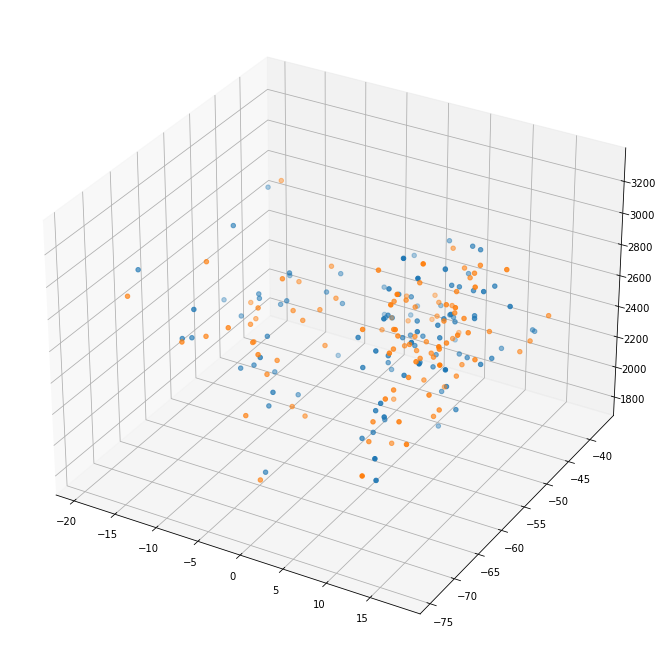

In [64]:

#3D Scatter plot of pitchers from 2020 and 2021 and their avg spin, horiz break, and vert break on curveballs
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (12,9))
ax = Axes3D(fig)
x = curves['CB Avg X Break 2020']
y = curves['CB Avg Z Break 2020']
z = curves['CB Avg Spin 2020']
a=curves['CB Avg X Break 2021']
b=curves['CB Avg Z Break 2021']
c=curves['CB Avg Spin 2021']
ax.scatter(x,y,z)
ax.scatter(a,b,c)
ax.set_xlabel('Avg X Spin Break')
ax.set_ylabel('Avg Z Spin Break')
ax.set_zlabel('Avg Spin')
plt.title('')

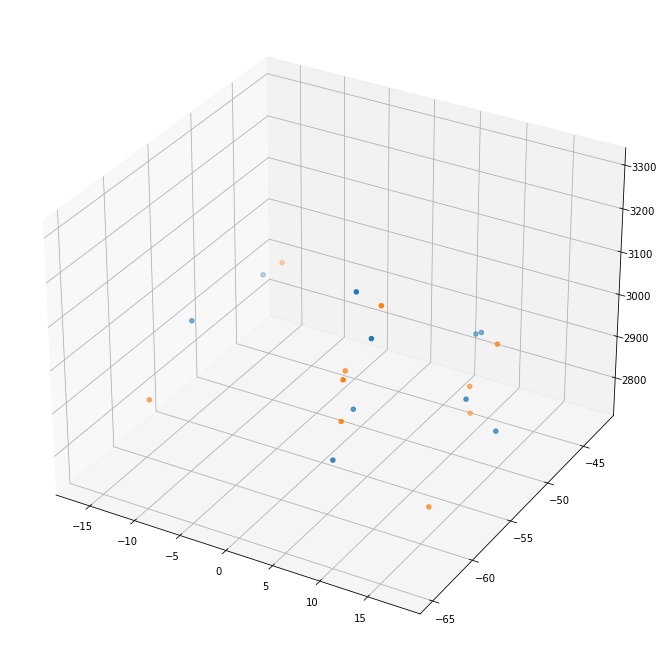

In [65]:
#3D Scatter plot of 10 best pitchers from 2020 and 2021 and their avg spin, horiz break, and vert break on curveballs
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (12,9))
ax = Axes3D(fig)
x = curves2020_max['CB Avg X Break 2020']
y = curves2020_max['CB Avg Z Break 2020']
z = curves2020_max['CB Avg Spin 2020']
a=curves2020_max['CB Avg X Break 2021']
b=curves2020_max['CB Avg Z Break 2021']
c=curves2020_max['CB Avg Spin 2021']
ax.scatter(x,y,z)
ax.scatter(a,b,c)


In [67]:
curves2021avg = curves['CB Avg Spin 2021'].mean()
curves2020avg = curves['CB Avg Spin 2020'].mean()
curves2021max = curves['CB Avg Spin 2021'].max()
curves2020max = curves['CB Avg Spin 2020'].max()
curves2021min = curves['CB Avg Spin 2021'].min()
curves2020min = curves['CB Avg Spin 2020'].min()
print('Averages')
print(curves2021avg)
print(curves2020avg)
print('Maximums')
print(curves2021max)
print(curves2020max)
print('Minimums')
print(curves2021min)
print(curves2020min)

Averages
2486.4411764705883
2505.343137254902
Maximums
3261.0
3299.0
Minimums
1786.0
1794.0
